<a href="https://colab.research.google.com/github/rajeshmore1/Random-Variables-And-Probability-Distributions/blob/main/Rajesh_More_Self_Project_Copy_Of_M2W3_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> As Josh Wills once said, <i>“Data Scientist is a person who is better at statistics than any programmer and better at programming than any statistician.” </i> .

# <b> In this self project, your task is to put up a descriptive notebook about the concept of random variables and probability distributions, containing rich context, powerful examples, a bit of Python codes to illustrate your points and charts (you can use python/desmos). 

### <u> A few guidelines : </u>
* #### Your notebook should contain at least 800 words.
* #### Your notebook should tell a story ( pick a real world example to set up the context)
* #### Your notebook should contain plots and charts for quick interpretation.


### Here is a sample article for your reference : https://www.countbayesie.com/blog/2015/2/20/random-variables-and-expectation </u>

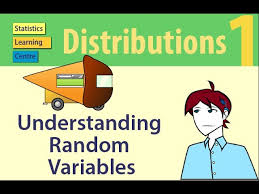

# **What Is a Random Variable?**

A random variable is a variable whose value is unknown or a function that assigns values to each of an experiment's outcomes. Random variables are often designated by letters and can be classified as discrete, which are variables that have specific values, or continuous, which are variables that can have any values within a continuous range.

# Discrete and Continuous Variables 

A discrete variable is a variable that can only take on a "countable" number of values. If you can count a set of items, then it’s a discrete variable. An example of a discrete variable is the outcome of a dice. It can only have 1 of 6 different possible outcomes and is therefore discrete. A discrete random variable can have an infinite number of values. For example, the whole set of natural numbers (1,2,3,etc.) is countable and therefore discrete.

A continuous variable takes on an "uncountable" number of values. An example of a continuous variable is length. Length can be measured to an arbitrary degree and is therefore continuous.

In statistics we represent a distribution of discrete variables with PMF's (Probability Mass Functions) and CDF's (Cumulative Distribution Functions). We represent distributions of continuous variables with PDF's (Probability Density Functions) and CDF's.

The PMF defines the probability of all possible values x of the random variable. A PDF is the same but for continuous values. The CDF represents the probability that the random variable X will have an outcome less or equal to the value x. The name CDF is used for both discrete and continuous distributions.

The functions that describe PMF's, PDF's and CDF's can be quite daunting at first, but their visual counterpart often looks quite intuitive.

# PMF (Probability Mass Function)

Here we visualize a PMF of a binomial distribution. You can see that the possible values are all integers. For example, no values are between 50 and 51.

The PMF of a binomial distribution in function form:

In [ ]:
from scipy.stats import binom
import math 
from math import sqrt

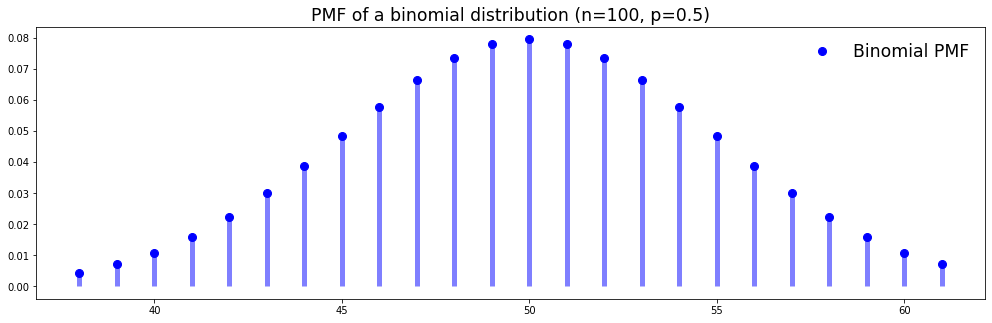

In [ ]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()


# PDF (Probability Density Functions)

The PDF is the same as a PMF, but continuous. It can be said that the distribution has an infinite number of possible values. Here we visualize a simple normal distribution with a mean of 0 and standard deviation of 1.

PDF of a normal distribution in formula form:



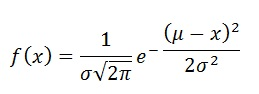

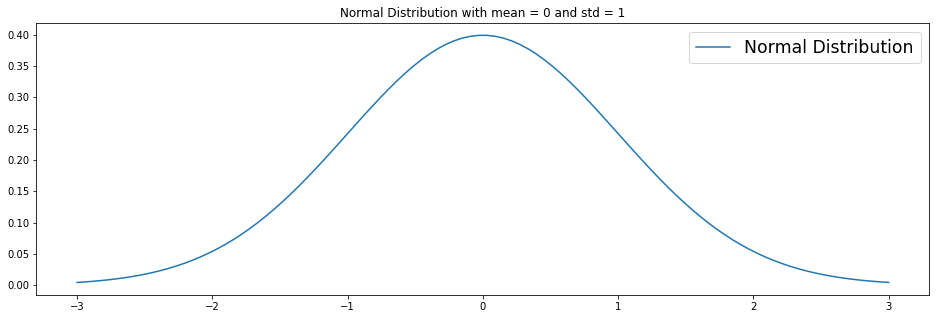

In [ ]:
# Plot normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

#CDF (Cumulative Distribution Function)

The CDF maps the probability that a random variable X will take a value of less than or equal to a value x (P(X ≤ x)). CDF's can be discrete or continuous. In this section we visualize the continuous case. You can see in the plot that the CDF accumulates all probabilities and is therefore bounded between 0 ≤ x ≤ 1.

The CDF of a normal distribution as a formula:

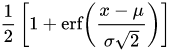

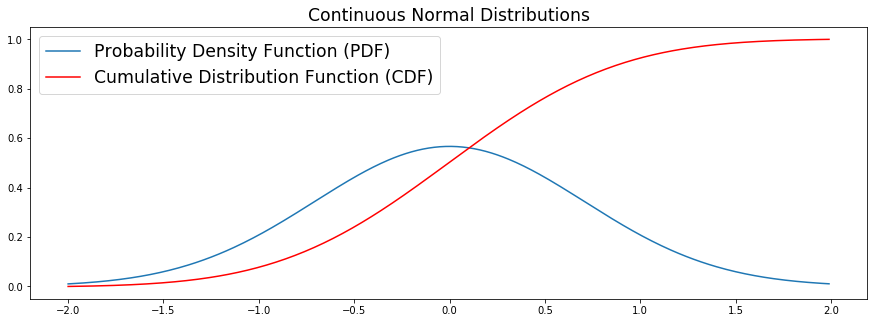

#**Probability Distributions**

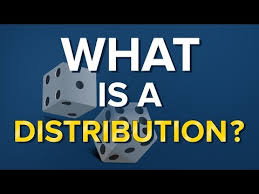

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events.

#The Uniform Distribution

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

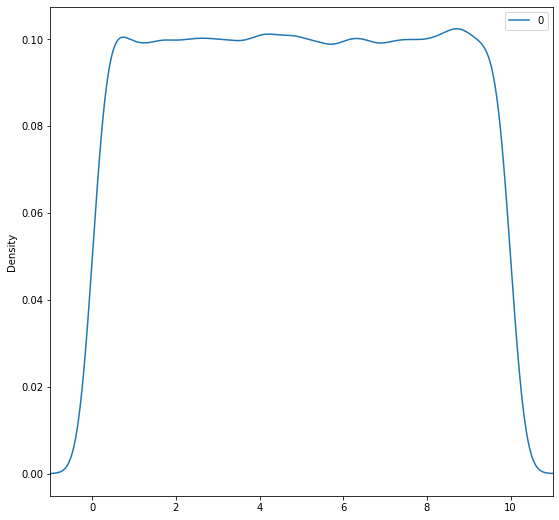

In [ ]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.

In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

-stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

-stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [ ]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

-stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [ ]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [ ]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


#The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [ ]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

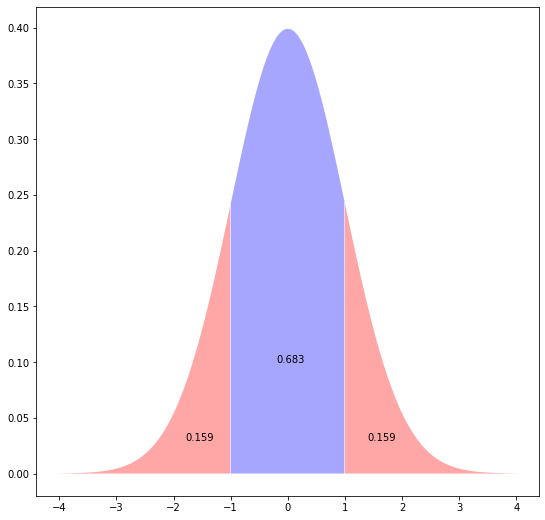

In [ ]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

Note: This lesson uses some plotting code we did not cover in the plotting lesson in order to make plots for explanatory purposes.

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean. Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [ ]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.

Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

# Example of Using the Normal Probability Distribution

Let’s start off with the normal distribution to show how to use continuous probability distributions.

The distribution of IQ scores is defined as a normal distribution with a mean of 100 and a standard deviation of 15. We’ll create the probability plot of this distribution. Additionally, let’s determine the likelihood that an IQ score will be between 120-140.

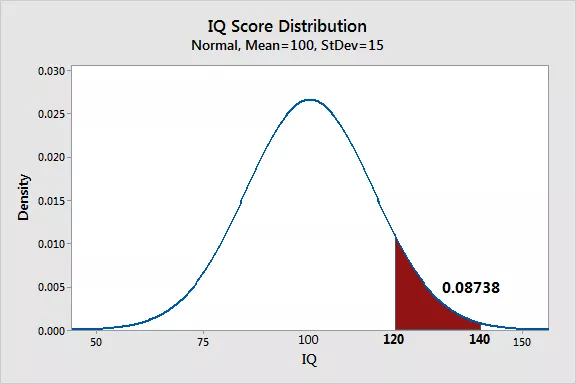

 We can see that it is a symmetric distribution where values occur most frequently around 100, which is the mean. The probabilities drops-off as you move away from the mean in both directions. The shaded area for the range of IQ scores between 120-140 contains 8.738% of the total area under the curve. Therefore, the likelihood that an IQ score falls within this range is 0.08738.

#The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   8  87  480  1127  2030  2489  1984  1226  450  110   9


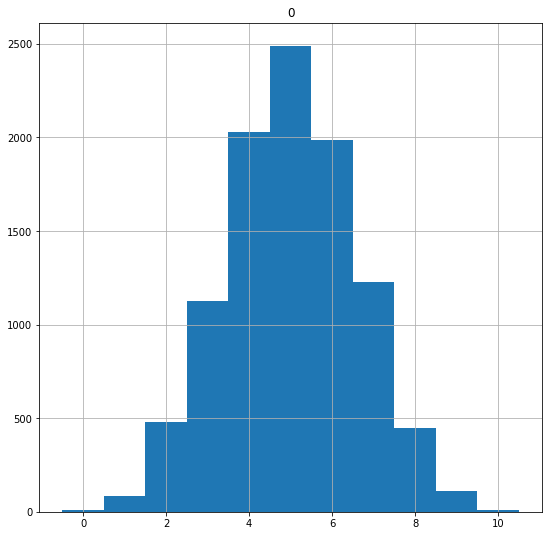

In [ ]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   7  57  268  898  1980  3026  2693  1071


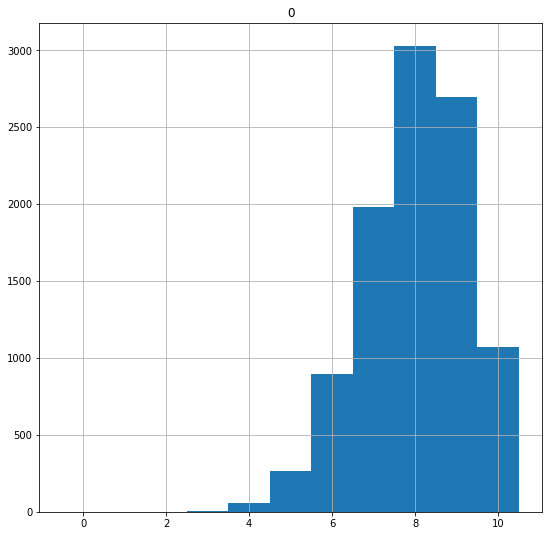

In [ ]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [ ]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [ ]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [ ]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [ ]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.301989888

# Example of Binomial distribution

Starting with an example, if someone tosses the coin then there is an equal chance of outcome it can be heads or tails. There is a 50% chance of the outcomes. Likewise, if you are appearing in an exam then there is also an equal possibility of getting passed or fail.

The binomial distribution summarized the number of trials, survey or experiment conducted. It is very useful when each outcome has the equal chance of attaining a particular value. The binomial distribution have some assumptions which show that there is only one outcome and this outcome have an equal chance of occurrence.

# The Geometric and Exponential Distributions

The geometric and exponential distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The scipy nickname for the geometric distribution is "geom". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  5050  2488  1235  652  292  131  80  32  21  10   5   2   2


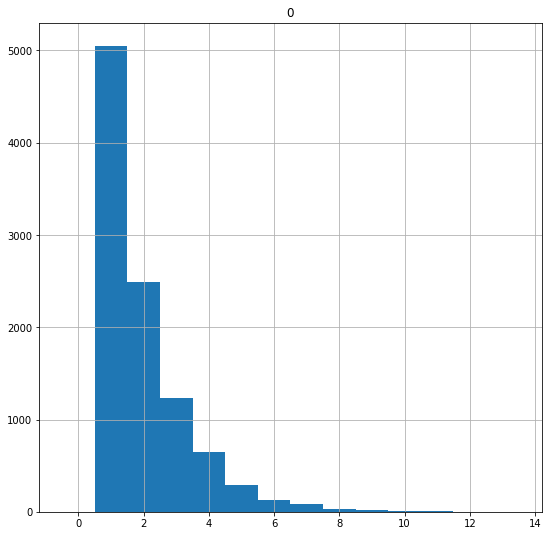

In [ ]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.

Let's use cdf() to check the probability of needing 6 flips or more to get a success:

In [ ]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

Use pmf() to check the probability of seeing a specific number of flips before a successes:

In [ ]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

The scipy name for the exponential distribution is "expon". Let's investigate the exponential distribution:


In [ ]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Note: The average arrival time for the exponential distribution is equal to 1/arrival_rate.

Let's plot this exponential distribution to get an idea of its shape:

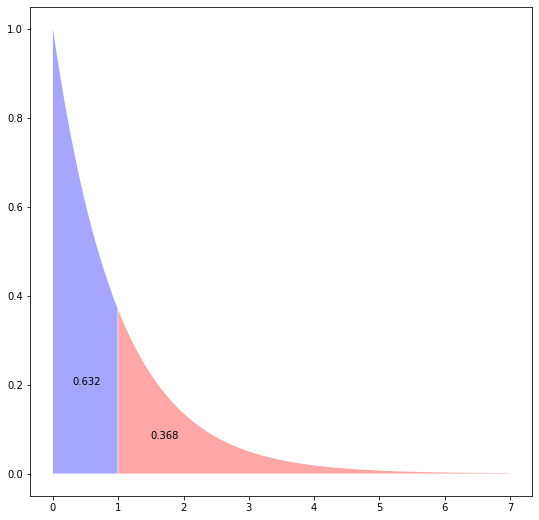

In [ ]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

# Example of geometric distribution

If your probability of success is 0.2, what is the probability you meet an independent voter on your third try?
Inserting 0.2 as p and with X = 3, the probability density function becomes:
f(x) = (1 − p)x − 1*p
P(X=3) = (1 − 0.2)3 − 1(0.2)
P(X=3) = (0.8)2*0.2 = 0.128.

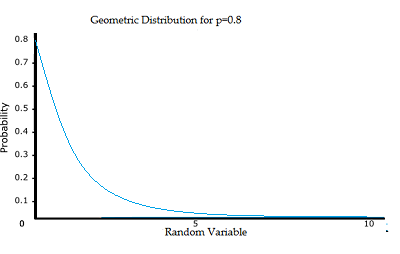

## The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3550  3718  1920  619  142  46  5


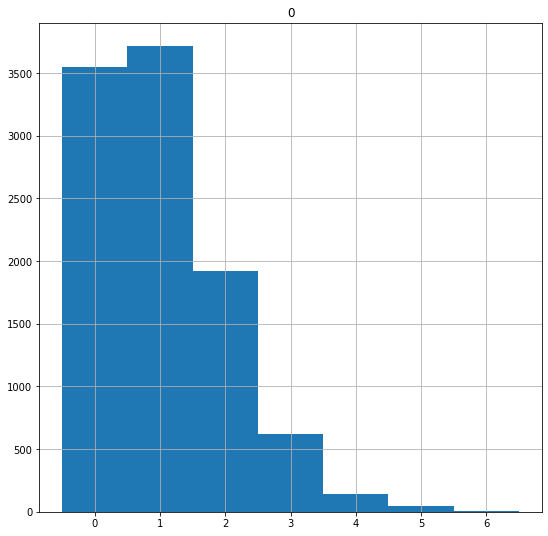

In [ ]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   1   2   3    4    5    6    7     8   ...   17  18  19  20  21  22  23  24
row_0                                         ...                                 
counts   5  30  91  218  363  662  954  1104  ...  107  64  46  16   4   1   3   3

[1 rows x 24 columns]


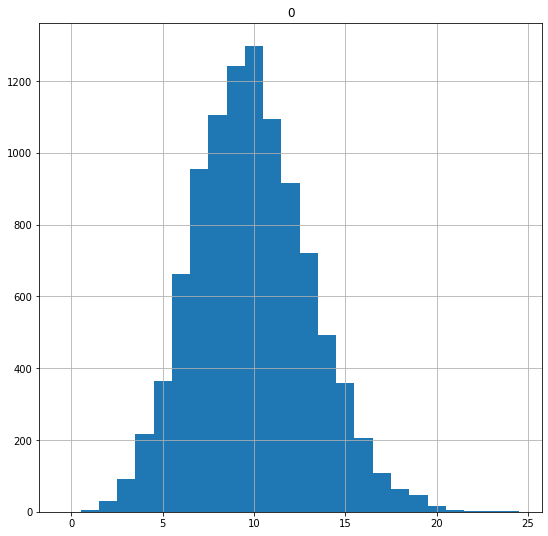

In [ ]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [ ]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [ ]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

# Example Of Poisson Distribution

In 1946 the British statistician R.D. Clarke published “An Application of the Poisson Distribution,” in which he disclosed his analysis of the distribution of hits of flying bombs (V-1 and V-2 missiles) in London during World War II. Some areas were hit more often than others. The British military wished to know if the Germans were targeting these districts (the hits indicating great technical precision) or if the distribution was due to chance. If the missiles were in fact only randomly targeted (within a more general area), the British could simply disperse important installations to decrease the likelihood of their being hit.



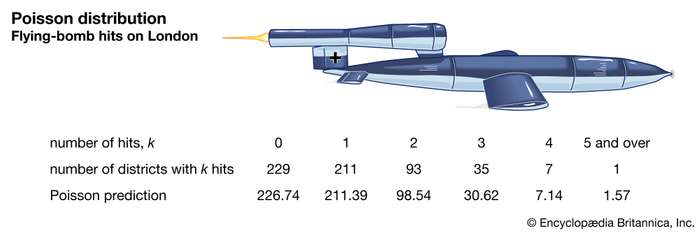

V-1 and V-2 strikes and the Poisson distribution

During World War II, British statistician R.D. Clarke demonstrated that V-1 and V-2 flying bombs were not precisely targeted but struck districts in London according to a predictable pattern known as the Poisson distribution. Thus, certain strategic districts, such as those containing important factories, were shown to be in no more danger than others.
Encyclopædia Britannica, Inc.

# T distribution

The T distribution, also known as the Student’s t-distribution, is a type of probability distribution that is similar to the normal distribution with its bell shape but has heavier tails. T distributions have a greater chance for extreme values than normal distributions, hence the fatter tails.


**KEY TAKEAWAYS**

The T distribution is a continuous probability distribution of the z-score when the estimated standard deviation is used in the denominator rather than the true standard deviation.

The T distribution, like the normal distribution, is bell-shaped and symmetric, but it has heavier tails, which means it tends to produce values that fall far from its mean.

T-tests are used in statistics to estimate significance.

**What Does a T Distribution Tell Us?**

Tail heaviness is determined by a parameter of the T distribution called degrees of freedom, with smaller values giving heavier tails, and with higher values making the T distribution resemble a standard normal distribution with a mean of 0, and a standard deviation of 1. The T distribution is also known as "Student's T Distribution."

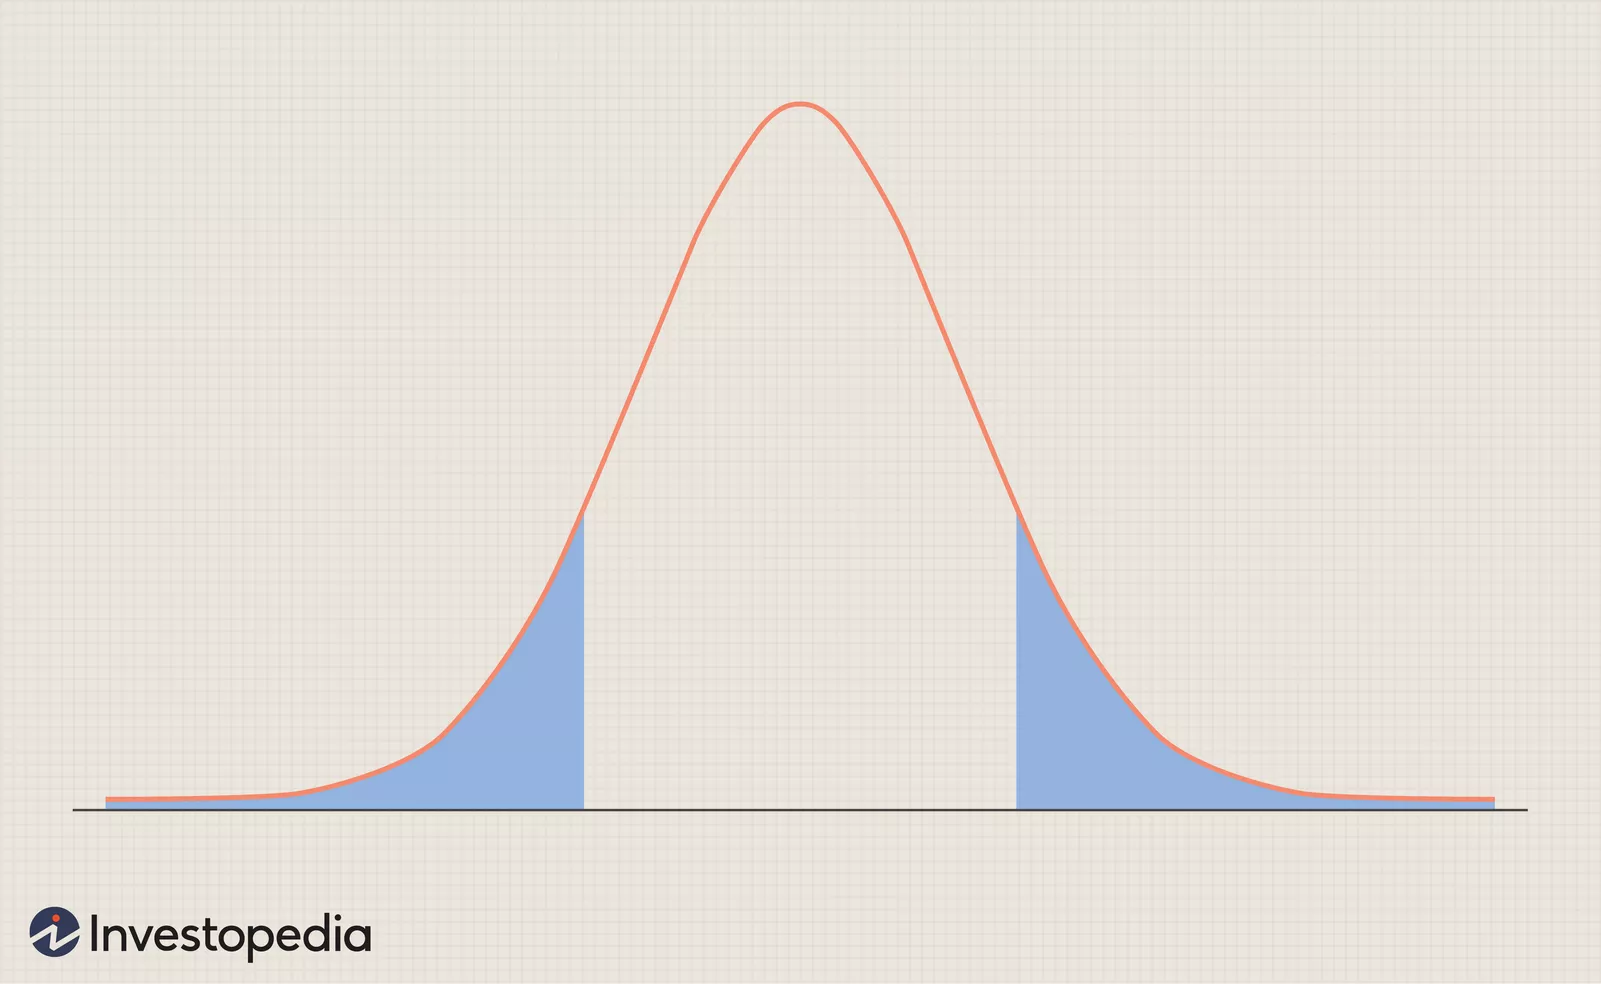

When a sample of n observations is taken from a normally distributed population having mean M and standard deviation D, the sample mean, m, and the sample standard deviation, d, will differ from M and D because of the randomness of the sample.


A z-score can be calculated with the population standard deviation as Z = (x – M)/D, and this value has the normal distribution with mean 0 and standard deviation 1. But when using the estimated standard deviation, a t-score is calculated as T = (m – M)/{d/sqrt(n)}, the difference between d and D makes the distribution a T distribution with (n - 1) degrees of freedom rather than the normal distribution with mean 0 and standard deviation 1. 

**The Difference Between a T Distribution and a Normal Distribution**

Normal distributions are used when the population distribution is assumed to be normal. The T distribution is similar to the normal distribution, just with fatter tails. Both assume a normally distributed population. T distributions have higher kurtosis than normal distributions. The probability of getting values very far from the mean is larger with a T distribution than a normal distribution.

# Chi Square Distribution

Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them. Both those variables should be from same population and they should be categorical like − Yes/No, Male/Female, Red/Green etc. For example, we can build a data set with observations on people's ice-cream buying pattern and try to correlate the gender of a person with the flavour of the ice-cream they prefer. If a correlation is found we can plan for appropriate stock of flavours by knowing the number of gender of people visiting.

We use various functions in numpy library to carry out the chi-square test.

No handles with labels found to put in legend.


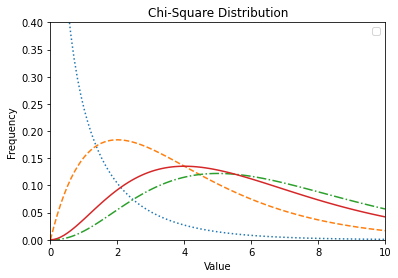

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()